
# LinkML model example for EHR data

Based on https://github.com/linkml and the Simple Event Ontology https://semanticweb.cs.vu.nl/2009/11/sem/

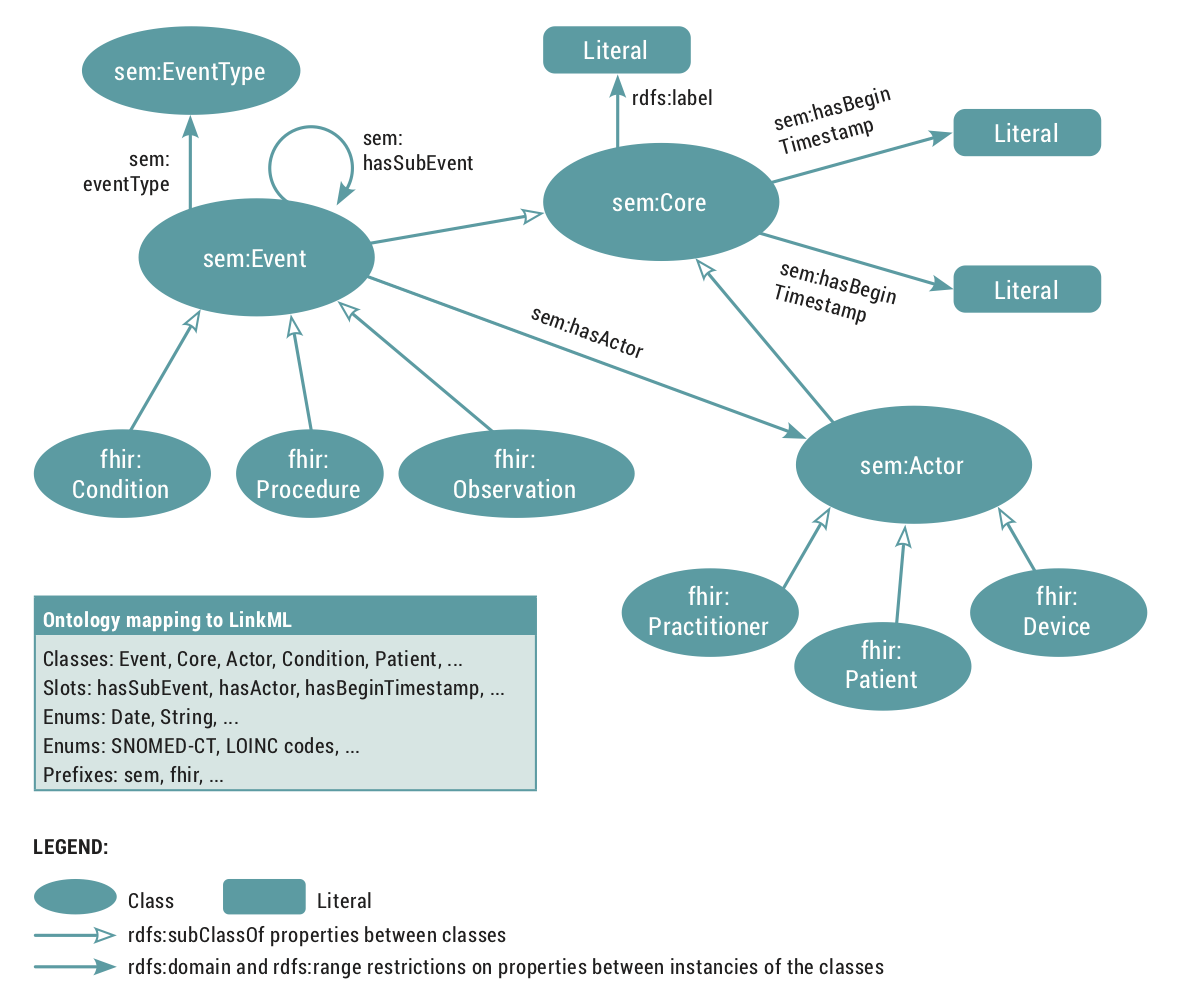

In [1]:
%reload_ext yamlmagic

In [2]:
from IPython.core.display import display, HTML
from types import ModuleType

from jsonasobj import as_json, loads
from rdflib import Graph

from linkml.generators.jsonldcontextgen import ContextGenerator
from linkml.generators.pythongen import PythonGenerator
from linkml.generators.shexgen import ShExGenerator
from linkml.generators.yumlgen import YumlGenerator
from linkml.generators.owlgen import OwlSchemaGenerator
from linkml_runtime.utils.yamlutils import DupCheckYamlLoader
from linkml_runtime.dumpers import json_dumper

## Basic model structure
This LinkML model example for EHR data consists of:
* a name
* a uri
* type definitions
* slot definitions
* class definitions

As an example, the model below defines:

In [3]:
%%yaml --loader DupCheckYamlLoader yaml
id: http://example.org/sample/example1
name: synopsis2
prefixes:
    samp: http://example.org/model/
    xsd: http://www.w3.org/2001/XMLSchema#
    sem: http://semanticweb.cs.vu.nl/2009/11/sem/
    schema: https://schema.org/
    fhir: http://hl7.org/fhir/

default_prefix: samp

default_curi_maps:
    - semweb_context

default_range: string

types:
    string:
        base: str
        uri: xsd:string
    int:
        base: int
        uri: xsd:integer
    boolean:
        base: Bool
        uri: xsd:boolean


classes:
    core:
        description: A generic concept for events and actors
        slots:
            - id
            - hasBeginTimestamp
            - hasEndTimestamp
            - type
            - label

    event:
        description: Anything that can happen to a patient (e.g., a procedure, an observation and a condition)
        is_a: core
        slot_usage:
            hasBeginTimestamp:
                required: True
            type:
                required: True
            label:
                required: True
        attributes:
            - subevent
            - has actor
            
    actor:
        description: A person or a device that can take part in any event connected with a patient
        is_a: core
        slot_usage:
            type:
                required: True
            label:
                required: True
        attributes:
            - name

slots:
    id:
        description: Unique identifier of a core concept
        identifier: true

    hasBeginTimestamp:
        description: The datetime when something starts
        slot_uri: sem:hasBeginTimestamp
        required: true

    hasEndTimestamp:
        description: The datetime when something ends
        slot_uri: sem:hasEndTimestamp

    type:
        description: The type of an event or an actor - e.g., procedure, observation, condition, practitioner, device
        range: string
        comments:
            - it should be linked to HL7 FHIR resource
            
    label:
        description: Label of the type above
        range: string
        slot_uri: rdfs:label

    subevent:
        description: An event can be followed by another event without any causal relationship
        range: event
        slot_uri: sem:hasSubEvent
        multivalued: true
        
    has actor:
        description: An event can have an actor involved in it
        range: event
        slot_uri: sem:hasActor
        multivalued: true
        
    name:
        description: Name of a practioner, patient or device
        range: string
        slot_uri: schema:name
        multivalued: true

<IPython.core.display.Javascript object>

### We can emit this model as a Python class

In [4]:
print(PythonGenerator(yaml, gen_slots=False).serialize())

# Auto generated from None by pythongen.py version: 0.9.0
# Generation date: 2022-07-30T19:27:03
# Schema: synopsis2
#
# id: http://example.org/sample/example1
# description:
# license:

import dataclasses
import sys
import re
from jsonasobj2 import JsonObj, as_dict
from typing import Optional, List, Union, Dict, ClassVar, Any
from dataclasses import dataclass
from linkml_runtime.linkml_model.meta import EnumDefinition, PermissibleValue, PvFormulaOptions

from linkml_runtime.utils.slot import Slot
from linkml_runtime.utils.metamodelcore import empty_list, empty_dict, bnode
from linkml_runtime.utils.yamlutils import YAMLRoot, extended_str, extended_float, extended_int
from linkml_runtime.utils.dataclass_extensions_376 import dataclasses_init_fn_with_kwargs
from linkml_runtime.utils.formatutils import camelcase, underscore, sfx
from linkml_runtime.utils.enumerations import EnumDefinitionImpl
from rdflib import Namespace, URIRef
from linkml_runtime.utils.curienamespace import CurieNamespa

### Compile the python into a module

In [5]:
spec = compile(PythonGenerator(yaml).serialize(), 'test', 'exec')
module = ModuleType('test')
exec(spec, module.__dict__)

### We can emit a UML rendering of  this model

In [6]:
display(HTML(f'<img src="{YumlGenerator(yaml).serialize()}"/>'))

### We can generate an OWL schema for the model

In [7]:
print(OwlSchemaGenerator(yaml).serialize())

@prefix IAO: <http://purl.obolibrary.org/obo/IAO_> .
@prefix linkml: <https://w3id.org/linkml/> .
@prefix owl: <http://www.w3.org/2002/07/owl#> .
@prefix rdfs: <http://www.w3.org/2000/01/rdf-schema#> .
@prefix samp: <http://example.org/model/> .
@prefix schema: <https://schema.org/> .
@prefix sem: <http://semanticweb.cs.vu.nl/2009/11/sem/> .
@prefix skos: <http://www.w3.org/2004/02/skos/core#> .
@prefix xsd: <http://www.w3.org/2001/XMLSchema#> .

samp:Actor a owl:Class,
        linkml:ClassDefinition ;
    rdfs:label "actor" ;
    rdfs:subClassOf [ a owl:Restriction ;
            owl:onClass samp:String ;
            owl:onProperty samp:type ;
            owl:qualifiedCardinality 1 ],
        [ a owl:Restriction ;
            owl:maxQualifiedCardinality 1 ;
            owl:onClass samp:String ;
            owl:onProperty samp:name ],
        [ a owl:Restriction ;
            owl:onClass samp:String ;
            owl:onProperty rdfs:label ;
            owl:qualifiedCardinality 1 ],
    

### We can emit a JSON-LD context for the model:

In [8]:
cntxt = ContextGenerator(yaml).serialize(base="http://example.org/events/")
print(cntxt)

{
   "_comments": "Auto generated from None by jsonldcontextgen.py version: 0.1.1\n    Generation date: 2022-07-30T19:28:31\n    Schema: synopsis2\n    metamodel version: 1.7.0\n    model version: None\n    \n    id: http://example.org/sample/example1\n    description: \n    license: \n    ",
   "@context": {
      "fhir": "http://hl7.org/fhir/",
      "rdfs": "http://www.w3.org/2000/01/rdf-schema#",
      "samp": "http://example.org/model/",
      "schema": "https://schema.org/",
      "sem": "http://semanticweb.cs.vu.nl/2009/11/sem/",
      "xsd": "http://www.w3.org/2001/XMLSchema#",
      "@vocab": "http://example.org/model/",
      "has_actor": {
         "@type": "@id",
         "@id": "sem:hasActor"
      },
      "hasBeginTimestamp": {
         "@id": "sem:hasBeginTimestamp"
      },
      "hasEndTimestamp": {
         "@id": "sem:hasEndTimestamp"
      },
      "id": "@id",
      "label": {
         "@id": "rdfs:label"
      },
      "name": {
         "@id": "schema:name"
    

### The python model can be used to create classes

In [9]:
# Generate an event
event_patient1 = module.Event(id="01", type="Condition", label="Diabetes Mellitus" , hasBeginTimestamp="10.08.2012")
print(event_patient1)

Event(id='01', hasBeginTimestamp='10.08.2012', hasEndTimestamp=None, type='Condition', label='Diabetes Mellitus', subevent=None, has_actor=None)


### and can be combined w/ the JSON-LD Context to generate RDF

In [10]:
jsonld = json_dumper.dumps(event_patient1, cntxt)
print(jsonld)
g = Graph()
g.parse(data=jsonld, format="json-ld")
print(g.serialize(format="turtle").decode())

{
  "id": "01",
  "hasBeginTimestamp": "10.08.2012",
  "type": "Condition",
  "label": "Diabetes Mellitus",
  "@type": "Event",
  "@context": {
    "fhir": "http://hl7.org/fhir/",
    "rdfs": "http://www.w3.org/2000/01/rdf-schema#",
    "samp": "http://example.org/model/",
    "schema": "https://schema.org/",
    "sem": "http://semanticweb.cs.vu.nl/2009/11/sem/",
    "xsd": "http://www.w3.org/2001/XMLSchema#",
    "@vocab": "http://example.org/model/",
    "has_actor": {
      "@type": "@id",
      "@id": "sem:hasActor"
    },
    "hasBeginTimestamp": {
      "@id": "sem:hasBeginTimestamp"
    },
    "hasEndTimestamp": {
      "@id": "sem:hasEndTimestamp"
    },
    "id": "@id",
    "label": {
      "@id": "rdfs:label"
    },
    "name": {
      "@id": "schema:name"
    },
    "subevent": {
      "@type": "@id",
      "@id": "sem:hasSubEvent"
    },
    "@base": "http://example.org/events/"
  }
}
@prefix : <http://example.org/model/> .
@prefix rdfs: <http://www.w3.org/2000/01/rdf-schem

### The model can be turned into ShEx

In [11]:
shex = ShExGenerator(yaml).serialize(collections=False)
print(shex)

# metamodel_version: 1.7.0
BASE <http://example.org/model/>
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>
PREFIX sem: <http://semanticweb.cs.vu.nl/2009/11/sem/>


<String> xsd:string

<Int> xsd:integer

<Boolean> xsd:boolean

<Actor> CLOSED {
    (  $<Actor_tes> (  &<Core_tes> ;
          rdf:type [ <Core> ] ? ;
          <name> @<String> ? ;
          <type> @<String> ;
          rdfs:label @<String>
       ) ;
       rdf:type [ <Actor> ]
    )
}

<Core>  (
    CLOSED {
       (  $<Core_tes> (  sem:hasBeginTimestamp @<String> ;
             sem:hasEndTimestamp @<String> ? ;
             <type> @<String> ? ;
             rdfs:label @<String> ?
          ) ;
          rdf:type [ <Core> ]
       )
    } OR @<Actor> OR @<Event>
)

<Event> CLOSED {
    (  $<Event_tes> (  &<Core_tes> ;
          rdf:type [ <Core> ] ? ;
          <subevent> @<String> ? ;
          <has_actor> @<St

### The ShEx can then be used to validate RDF

In [12]:
from pyshex.evaluate import evaluate
r = evaluate(g, shex,
             start="http://example.org/model/Event",
             focus="http://example.org/events/01")
print("Conforms" if r[0] else r[1])

Conforms


In [13]:
r = evaluate(g, shex,
             start="http://example.org/model/Event",
             focus="http://example.org/events/02")
print("Conforms" if r[0] else r[1])

Focus: http://example.org/events/02 not in graph


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=bb0385ef-6087-4e6a-8d24-bcb3672ff23a' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>